unziping the dataset

In [1]:
! unzip /content/drive/MyDrive/data/fer2013.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

import needed libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as dgen
from tensorflow.keras.callbacks import ModelCheckpoint as mdlCheck
from tensorflow.keras.layers import Dense,Convolution2D,Flatten,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
train_path = 'train'
test_path = 'test'

data preprocessing and augmentation

In [5]:
train_dgen = dgen(

    rescale = 1./255,
    rotation_range = 30,
    width_shift_range  = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2,

)

validation_dgen = dgen(
    rescale = 1./255,
    validation_split = 0.2
)

test_dgen = dgen(
    rescale = 1./255,
)

In [6]:
train_generator = train_dgen.flow_from_directory(
    directory = train_path,
    shuffle=True,
    target_size = (48,48),
    batch_size = 50,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    subset = 'training'
)

valid_generator = validation_dgen.flow_from_directory(
    directory  = train_path,
    shuffle=True,
    target_size = (48,48),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = 50,
    subset = 'validation'
)

test_generator = test_dgen.flow_from_directory(
    directory  = test_path,
    target_size = (48,48),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    batch_size = 32,
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


creating our model

In [7]:
model = Sequential()
model.add(Convolution2D(32,kernel_size=(3,3),strides=2,activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Convolution2D(64,kernel_size=(3,3),strides=1,activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Convolution2D(128,kernel_size=(3,3),strides=1,activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128,kernel_size=(3,3),strides=1,activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Convolution2D(256,kernel_size=(3,3),strides=1,activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512,kernel_size=(3,3),strides=1,activation='relu',padding = 'same'))#
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(700,activation='relu'))
model.add(Dense(350,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(7,activation='softmax'))

**training**

In [8]:
model.compile(
    optimizer = Adam(learning_rate=0.001) ,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
check = mdlCheck(
    filepath = 'modle_wheights.h5',
    monitor = 'val_accuarcy',
    save_best_only = True
)

In [10]:
fit_model = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    batch_size=100,
    epochs=50,
    callbacks=[check],
    validation_data = valid_generator,
    validation_steps = len(valid_generator),
)

Epoch 1/50
460/460 [==============================] - ETA: 0s - loss: 1.7810 - accuracy: 0.2626

460/460 [==============================] - 36s 51ms/step - loss: 1.7810 - accuracy: 0.2626 - val_loss: 1.8365 - val_accuracy: 0.2517
Epoch 2/50
459/460 [============================>.] - ETA: 0s - loss: 1.6487 - accuracy: 0.3436

460/460 [==============================] - 22s 48ms/step - loss: 1.6485 - accuracy: 0.3437 - val_loss: 1.6812 - val_accuracy: 0.3752
Epoch 3/50
460/460 [==============================] - ETA: 0s - loss: 1.5352 - accuracy: 0.4005

460/460 [==============================] - 22s 49ms/step - loss: 1.5352 - accuracy: 0.4005 - val_loss: 1.5562 - val_accuracy: 0.3963
Epoch 4/50
460/460 [==============================] - ETA: 0s - loss: 1.4407 - accuracy: 0.4414

460/460 [==============================] - 21s 46ms/step - loss: 1.4407 - accuracy: 0.4414 - val_loss: 1.2995 - val_accuracy: 0.5032
Epoch 5/50
459/460 [============================>.] - ETA: 0s - loss: 1.3844 - accuracy: 0.4709

460/460 [==============================] - 22s 48ms/step - loss: 1.3848 - accuracy: 0.4707 - val_loss: 1.3916 - val_accuracy: 0.4726
Epoch 6/50
459/460 [============================>.] - ETA: 0s - loss: 1.3364 - accuracy: 0.4871

460/460 [==============================] - 22s 48ms/step - loss: 1.3359 - accuracy: 0.4872 - val_loss: 1.2656 - val_accuracy: 0.5215
Epoch 7/50
459/460 [============================>.] - ETA: 0s - loss: 1.3081 - accuracy: 0.5029

460/460 [==============================] - 22s 49ms/step - loss: 1.3082 - accuracy: 0.5029 - val_loss: 1.3358 - val_accuracy: 0.5105
Epoch 8/50
459/460 [============================>.] - ETA: 0s - loss: 1.2861 - accuracy: 0.5136

460/460 [==============================] - 24s 51ms/step - loss: 1.2855 - accuracy: 0.5138 - val_loss: 1.3067 - val_accuracy: 0.5069
Epoch 9/50
460/460 [==============================] - ETA: 0s - loss: 1.2651 - accuracy: 0.5217

460/460 [==============================] - 23s 49ms/step - loss: 1.2651 - accuracy: 0.5217 - val_loss: 1.2267 - val_accuracy: 0.5450
Epoch 10/50
460/460 [==============================] - ETA: 0s - loss: 1.2525 - accuracy: 0.5241

460/460 [==============================] - 22s 47ms/step - loss: 1.2525 - accuracy: 0.5241 - val_loss: 1.2091 - val_accuracy: 0.5428
Epoch 11/50
459/460 [============================>.] - ETA: 0s - loss: 1.2300 - accuracy: 0.5358

460/460 [==============================] - 21s 46ms/step - loss: 1.2301 - accuracy: 0.5357 - val_loss: 1.2925 - val_accuracy: 0.5039
Epoch 12/50
460/460 [==============================] - ETA: 0s - loss: 1.2172 - accuracy: 0.5416

460/460 [==============================] - 22s 48ms/step - loss: 1.2172 - accuracy: 0.5416 - val_loss: 1.1168 - val_accuracy: 0.5769
Epoch 13/50
460/460 [==============================] - ETA: 0s - loss: 1.1981 - accuracy: 0.5466

460/460 [==============================] - 22s 48ms/step - loss: 1.1981 - accuracy: 0.5466 - val_loss: 1.1443 - val_accuracy: 0.5678
Epoch 14/50
460/460 [==============================] - ETA: 0s - loss: 1.1853 - accuracy: 0.5531

460/460 [==============================] - 22s 48ms/step - loss: 1.1853 - accuracy: 0.5531 - val_loss: 1.1599 - val_accuracy: 0.5640
Epoch 15/50
460/460 [==============================] - ETA: 0s - loss: 1.1739 - accuracy: 0.5592

460/460 [==============================] - 21s 46ms/step - loss: 1.1739 - accuracy: 0.5592 - val_loss: 1.1605 - val_accuracy: 0.5677
Epoch 16/50
460/460 [==============================] - ETA: 0s - loss: 1.1649 - accuracy: 0.5613

460/460 [==============================] - 22s 49ms/step - loss: 1.1649 - accuracy: 0.5613 - val_loss: 1.1281 - val_accuracy: 0.5764
Epoch 17/50
459/460 [============================>.] - ETA: 0s - loss: 1.1541 - accuracy: 0.5631

460/460 [==============================] - 22s 49ms/step - loss: 1.1542 - accuracy: 0.5632 - val_loss: 1.1095 - val_accuracy: 0.5802
Epoch 18/50
460/460 [==============================] - ETA: 0s - loss: 1.1447 - accuracy: 0.5704

460/460 [==============================] - 22s 49ms/step - loss: 1.1447 - accuracy: 0.5704 - val_loss: 1.0629 - val_accuracy: 0.6039
Epoch 19/50
459/460 [============================>.] - ETA: 0s - loss: 1.1390 - accuracy: 0.5718

460/460 [==============================] - 21s 47ms/step - loss: 1.1393 - accuracy: 0.5717 - val_loss: 1.1248 - val_accuracy: 0.5738
Epoch 20/50
460/460 [==============================] - ETA: 0s - loss: 1.1297 - accuracy: 0.5753

460/460 [==============================] - 22s 48ms/step - loss: 1.1297 - accuracy: 0.5753 - val_loss: 1.1012 - val_accuracy: 0.5786
Epoch 21/50
459/460 [============================>.] - ETA: 0s - loss: 1.1267 - accuracy: 0.5751

460/460 [==============================] - 22s 48ms/step - loss: 1.1267 - accuracy: 0.5751 - val_loss: 1.1351 - val_accuracy: 0.5785
Epoch 22/50
460/460 [==============================] - ETA: 0s - loss: 1.1090 - accuracy: 0.5832

460/460 [==============================] - 22s 48ms/step - loss: 1.1090 - accuracy: 0.5832 - val_loss: 1.1176 - val_accuracy: 0.5741
Epoch 23/50
460/460 [==============================] - ETA: 0s - loss: 1.0950 - accuracy: 0.5887

460/460 [==============================] - 22s 49ms/step - loss: 1.0950 - accuracy: 0.5887 - val_loss: 1.1685 - val_accuracy: 0.5492
Epoch 24/50
459/460 [============================>.] - ETA: 0s - loss: 1.0980 - accuracy: 0.5891

460/460 [==============================] - 22s 48ms/step - loss: 1.0976 - accuracy: 0.5893 - val_loss: 1.0736 - val_accuracy: 0.6002
Epoch 25/50
460/460 [==============================] - ETA: 0s - loss: 1.0879 - accuracy: 0.5938

460/460 [==============================] - 23s 49ms/step - loss: 1.0879 - accuracy: 0.5938 - val_loss: 1.1043 - val_accuracy: 0.5908
Epoch 26/50
459/460 [============================>.] - ETA: 0s - loss: 1.0827 - accuracy: 0.5946

460/460 [==============================] - 23s 49ms/step - loss: 1.0827 - accuracy: 0.5946 - val_loss: 1.1047 - val_accuracy: 0.5914
Epoch 27/50
459/460 [============================>.] - ETA: 0s - loss: 1.0818 - accuracy: 0.5923

460/460 [==============================] - 23s 49ms/step - loss: 1.0818 - accuracy: 0.5924 - val_loss: 1.0871 - val_accuracy: 0.5910
Epoch 28/50
459/460 [============================>.] - ETA: 0s - loss: 1.0711 - accuracy: 0.5982

460/460 [==============================] - 23s 51ms/step - loss: 1.0708 - accuracy: 0.5982 - val_loss: 1.0677 - val_accuracy: 0.6091
Epoch 29/50
460/460 [==============================] - ETA: 0s - loss: 1.0670 - accuracy: 0.5991

460/460 [==============================] - 23s 50ms/step - loss: 1.0670 - accuracy: 0.5991 - val_loss: 1.0689 - val_accuracy: 0.6020
Epoch 30/50
459/460 [============================>.] - ETA: 0s - loss: 1.0651 - accuracy: 0.5987

460/460 [==============================] - 23s 50ms/step - loss: 1.0650 - accuracy: 0.5988 - val_loss: 1.0273 - val_accuracy: 0.6149
Epoch 31/50
460/460 [==============================] - ETA: 0s - loss: 1.0570 - accuracy: 0.6024

460/460 [==============================] - 22s 48ms/step - loss: 1.0570 - accuracy: 0.6024 - val_loss: 1.0526 - val_accuracy: 0.6013
Epoch 32/50
460/460 [==============================] - ETA: 0s - loss: 1.0500 - accuracy: 0.6062

460/460 [==============================] - 23s 50ms/step - loss: 1.0500 - accuracy: 0.6062 - val_loss: 1.0468 - val_accuracy: 0.5968
Epoch 33/50
460/460 [==============================] - ETA: 0s - loss: 1.0451 - accuracy: 0.6092

460/460 [==============================] - 22s 47ms/step - loss: 1.0451 - accuracy: 0.6092 - val_loss: 1.0249 - val_accuracy: 0.6222
Epoch 34/50
459/460 [============================>.] - ETA: 0s - loss: 1.0469 - accuracy: 0.6085

460/460 [==============================] - 23s 50ms/step - loss: 1.0468 - accuracy: 0.6085 - val_loss: 1.0327 - val_accuracy: 0.6199
Epoch 35/50
459/460 [============================>.] - ETA: 0s - loss: 1.0398 - accuracy: 0.6121

460/460 [==============================] - 25s 55ms/step - loss: 1.0399 - accuracy: 0.6120 - val_loss: 1.0810 - val_accuracy: 0.6002
Epoch 36/50
460/460 [==============================] - ETA: 0s - loss: 1.0378 - accuracy: 0.6084

460/460 [==============================] - 21s 47ms/step - loss: 1.0378 - accuracy: 0.6084 - val_loss: 1.0628 - val_accuracy: 0.6008
Epoch 37/50
459/460 [============================>.] - ETA: 0s - loss: 1.0310 - accuracy: 0.6115

460/460 [==============================] - 22s 49ms/step - loss: 1.0304 - accuracy: 0.6117 - val_loss: 1.0352 - val_accuracy: 0.6130
Epoch 38/50
460/460 [==============================] - ETA: 0s - loss: 1.0241 - accuracy: 0.6165

460/460 [==============================] - 21s 46ms/step - loss: 1.0241 - accuracy: 0.6165 - val_loss: 1.0211 - val_accuracy: 0.6210
Epoch 39/50
459/460 [============================>.] - ETA: 0s - loss: 1.0259 - accuracy: 0.6167

460/460 [==============================] - 22s 49ms/step - loss: 1.0257 - accuracy: 0.6167 - val_loss: 1.0226 - val_accuracy: 0.6231
Epoch 40/50
459/460 [============================>.] - ETA: 0s - loss: 1.0212 - accuracy: 0.6165

460/460 [==============================] - 23s 51ms/step - loss: 1.0214 - accuracy: 0.6165 - val_loss: 1.0484 - val_accuracy: 0.6156
Epoch 41/50
459/460 [============================>.] - ETA: 0s - loss: 1.0206 - accuracy: 0.6123

460/460 [==============================] - 23s 49ms/step - loss: 1.0200 - accuracy: 0.6125 - val_loss: 1.0109 - val_accuracy: 0.6241
Epoch 42/50
460/460 [==============================] - ETA: 0s - loss: 1.0091 - accuracy: 0.6220

460/460 [==============================] - 23s 49ms/step - loss: 1.0091 - accuracy: 0.6220 - val_loss: 1.1592 - val_accuracy: 0.5654
Epoch 43/50
459/460 [============================>.] - ETA: 0s - loss: 1.0040 - accuracy: 0.6229

460/460 [==============================] - 22s 49ms/step - loss: 1.0044 - accuracy: 0.6226 - val_loss: 1.0374 - val_accuracy: 0.6091
Epoch 44/50
460/460 [==============================] - ETA: 0s - loss: 1.0108 - accuracy: 0.6238

460/460 [==============================] - 22s 49ms/step - loss: 1.0108 - accuracy: 0.6238 - val_loss: 1.0456 - val_accuracy: 0.6133
Epoch 45/50
459/460 [============================>.] - ETA: 0s - loss: 1.0089 - accuracy: 0.6222

460/460 [==============================] - 22s 47ms/step - loss: 1.0087 - accuracy: 0.6221 - val_loss: 1.0480 - val_accuracy: 0.6168
Epoch 46/50
460/460 [==============================] - ETA: 0s - loss: 1.0038 - accuracy: 0.6214

460/460 [==============================] - 22s 48ms/step - loss: 1.0038 - accuracy: 0.6214 - val_loss: 1.0357 - val_accuracy: 0.6084
Epoch 47/50
460/460 [==============================] - ETA: 0s - loss: 0.9993 - accuracy: 0.6249

460/460 [==============================] - 21s 45ms/step - loss: 0.9993 - accuracy: 0.6249 - val_loss: 1.0359 - val_accuracy: 0.6203
Epoch 48/50
459/460 [============================>.] - ETA: 0s - loss: 0.9874 - accuracy: 0.6302

460/460 [==============================] - 23s 50ms/step - loss: 0.9870 - accuracy: 0.6303 - val_loss: 1.0916 - val_accuracy: 0.6009
Epoch 49/50
460/460 [==============================] - ETA: 0s - loss: 0.9972 - accuracy: 0.6252

460/460 [==============================] - 22s 48ms/step - loss: 0.9972 - accuracy: 0.6252 - val_loss: 1.0396 - val_accuracy: 0.6124
Epoch 50/50
459/460 [============================>.] - ETA: 0s - loss: 0.9853 - accuracy: 0.6299

460/460 [==============================] - 21s 47ms/step - loss: 0.9853 - accuracy: 0.6299 - val_loss: 1.0022 - val_accuracy: 0.6306


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 23, 23, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

saving the model

In [12]:
model.save('last_model.keras')

In [13]:
! mv 'last_model.keras' 'drive/MyDrive/data/'

plotting the loss and accuracy

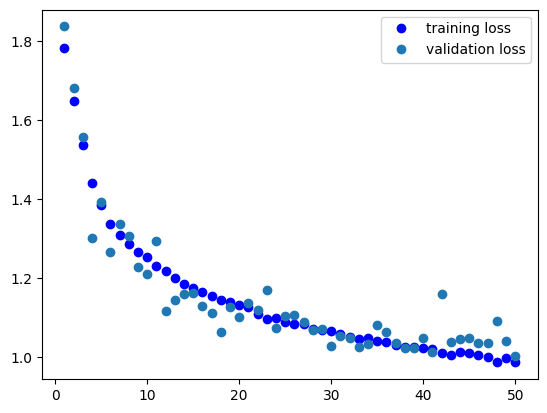

In [14]:
train_loss = fit_model.history['loss']
val_loss = fit_model.history['val_loss']
epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'o',label='validation loss')
plt.xlabel = 'epochs'
plt.ylabel = 'loss'
plt.legend()
plt.show()

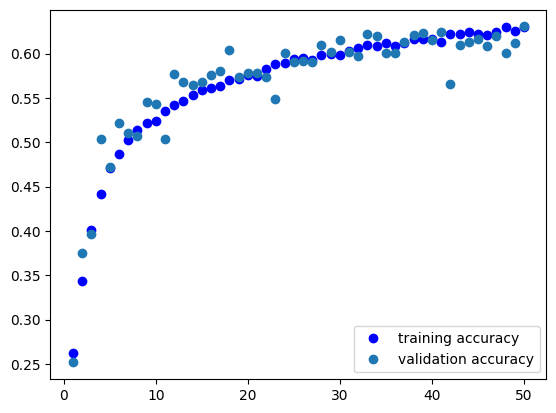

In [15]:
train_acc = fit_model.history['accuracy']
val_acc = fit_model.history['val_accuracy']
epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_acc,'bo',label='training accuracy')
plt.plot(epochs,val_acc,'o',label='validation accuracy')
plt.xlabel = 'epochs'
plt.ylabel = 'accuracy'
plt.legend()
plt.show()

evaluating the model on the test set

In [24]:
import keras

In [25]:
model = keras.models.load_model('drive/MyDrive/data/last_model.keras')

In [26]:
model.evaluate(test_generator)

225/225 [==============================] - 4s 15ms/step - loss: 0.9979 - accuracy: 0.6269


[0.9979078769683838, 0.6269155740737915]

our model reached around 63% accuracy on train and validation sets and 62.7% on test set that is in human level accuracy on this dataset and it is satisficing!